In [2]:
import pandas as pd

#Reading and checking the data set.

myData = pd.read_csv(r"MBTI_DataSet.csv")



myData.head()



,p_types,comments
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [3]:
myData.tail()

,p_types,comments
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...
8674,INFP,'It has been too long since I have been on per...


In [4]:
#Getting Summary information that describe the data set

myData.describe(include=['object'])

,p_types,comments
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [5]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   p_types   8675 non-null   object
 1   comments  8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [6]:
#Checking the order of the data matrix

myData.shape

(8675, 2)

In [7]:
#Checking for null values across attributes.
myData.isnull().any()

p_types     False
comments    False
dtype: bool

In [8]:
import numpy as np

#Getting the unique personalities.

p_types_unique = np.unique(np.array(myData['p_types']))
print(p_types_unique)

['ENFJ' 'ENFP' 'ENTJ' 'ENTP' 'ESFJ' 'ESFP' 'ESTJ' 'ESTP' 'INFJ' 'INFP'
 'INTJ' 'INTP' 'ISFJ' 'ISFP' 'ISTJ' 'ISTP']


In [9]:
#Grouping the data based on personality types for some statistical analysis

#The commenters/bloggers with same personity group, made 50 comments each so we multiply by 50 to get the total number of posts. 

groupSummary = (myData.groupby(['p_types']).count()) * 50
groupSummary

,comments
p_types,
ENFJ,9500
ENFP,33750
ENTJ,11550
ENTP,34250
ESFJ,2100
ESFP,2400
ESTJ,1950
ESTP,4450
INFJ,73500


Text(0.5, 1.0, 'Summary comments for each personality type')

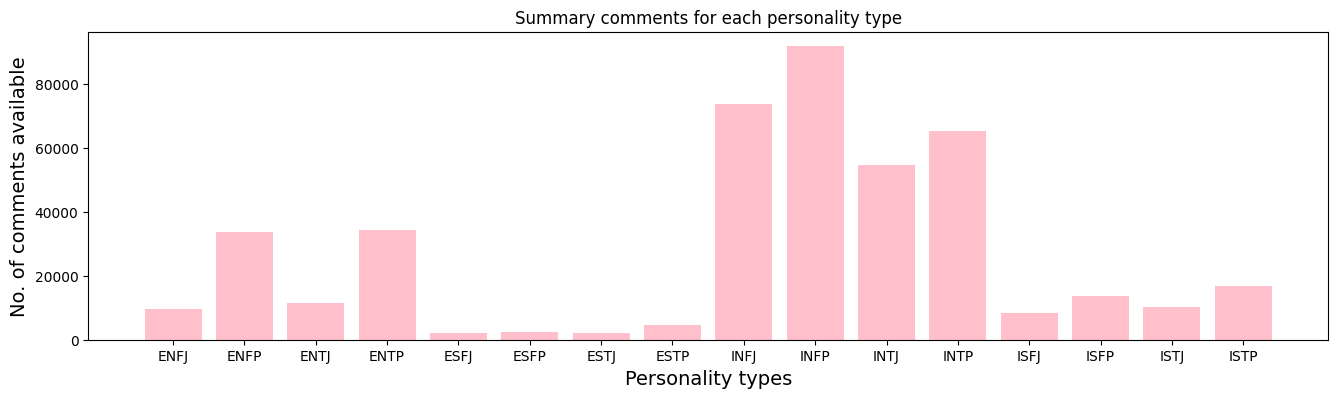

In [207]:
import matplotlib.pyplot as plot

plot.figure(figsize = (16,4))
plot.bar(np.array(groupSummary.index), height = groupSummary['comments'],color = "pink")
plot.xlabel('Personality types', size = 14)
plot.ylabel('No. of comments available', size = 14)
plot.title('Summary comments for each personality type')

<AxesSubplot: xlabel='p_types', ylabel='words_per_comment'>

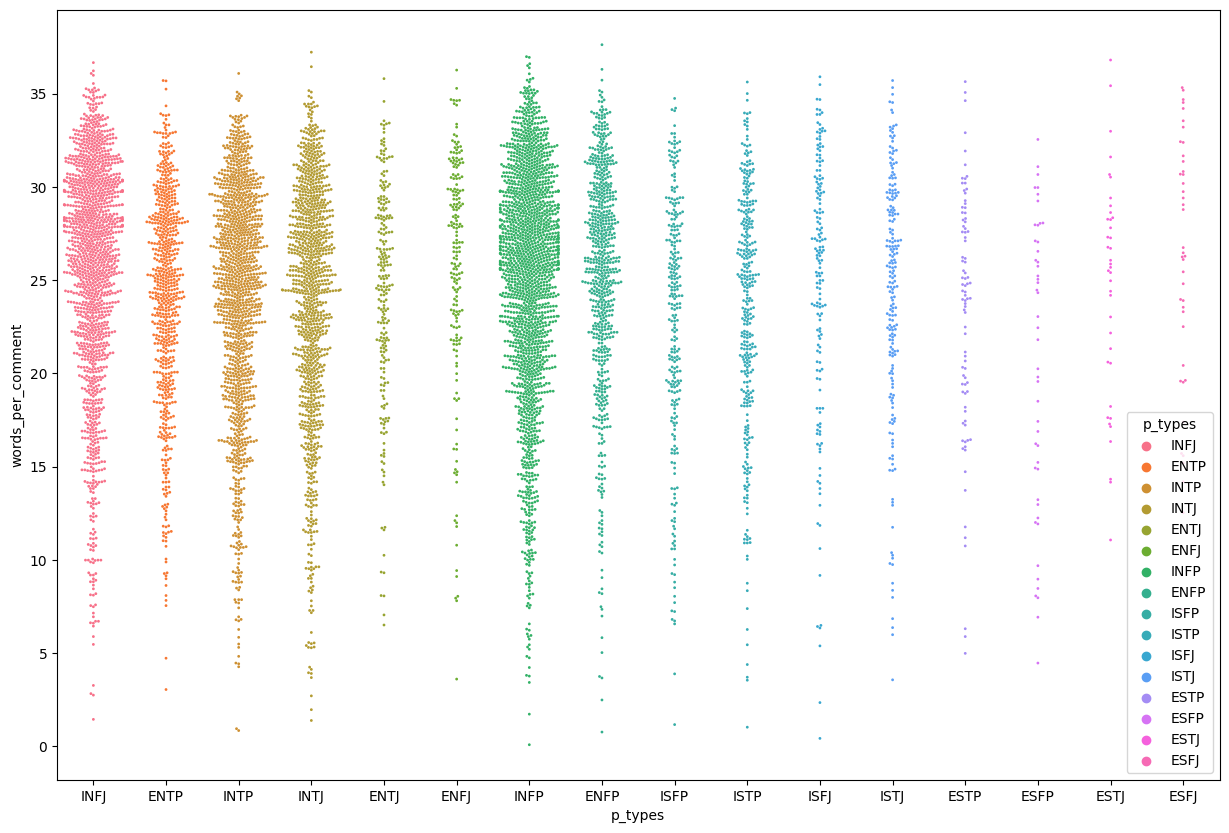

In [11]:
#making further analysis by generating additional features

myDataCopy = myData.copy()

#create a function that splits the words in the 50 comments of a user and calculates the variance of words-count in each row

def row_variance(row):
    
    #l = [len(i.split()) for i in row.split('|||')]
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    
    return np.var(l)
  

#this lambda function evaluates the number of words per comment out of the 50 posts in each row

myDataCopy['words_per_comment'] = myDataCopy['comments'].apply(lambda x: len(x.split())/50)


#this lambda function evaluates the variance of the word counts from the 50 posts in each row

myDataCopy['variance_of_word_counts'] = myDataCopy['comments'].apply(lambda x: row_variance(x))

plot.figure(figsize=(15,10))


#A swarm plot of the words per comment (that is, from the 50 posts per row) against the 16 unique personality types.
import seaborn as sns
sns.swarmplot(data=myDataCopy, x = "p_types", y = "words_per_comment", hue = "p_types", size = 2)

<Figure size 1500x1000 with 0 Axes>

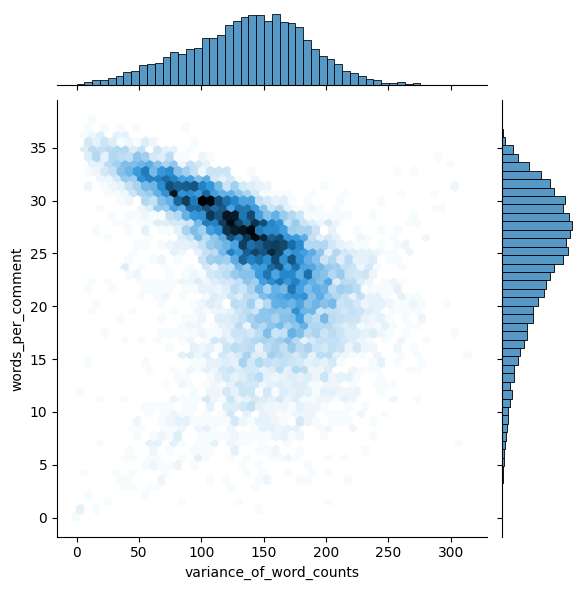

In [12]:
#A joint plot to visualize and analyse the relationship between the words per comment and 
#the variance of the word counts along with their individual distributions.

plot.figure(figsize = (15,10))
sns.jointplot(data=myDataCopy, x = "variance_of_word_counts", y = "words_per_comment",  kind="hex")

Text(0.5, 1.0, 'The Distribution of Lengths for all 50 Comments')

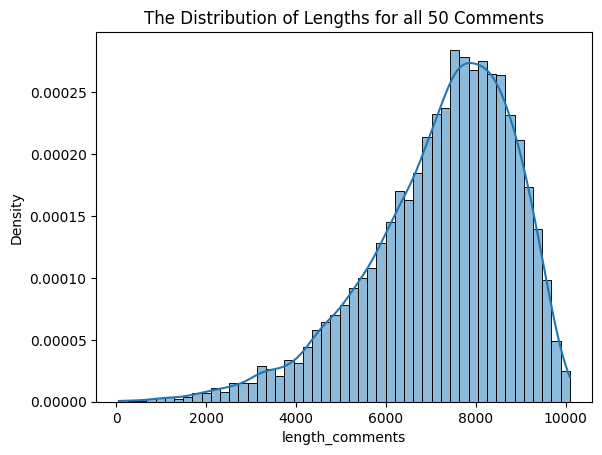

In [13]:
myDataCopy["length_comments"] = myDataCopy["comments"].apply(len)
sns.histplot(myDataCopy["length_comments"],stat = 'density',kde = True).set_title("The Distribution of Lengths for all 50 Comments")

In [14]:
#Investigating the most common words in all of the 50 posts in each row.

list_of_wordsList = list(myDataCopy["comments"].apply(lambda x: x.split()))
wordsList = [y for x in list_of_wordsList for y in x]

from collections import Counter
Counter(wordsList).most_common(40)

[('I', 387957),
 ('to', 290168),
 ('the', 270699),
 ('a', 230918),
 ('and', 219498),
 ('of', 177853),
 ('is', 128804),
 ('you', 128750),
 ('that', 127221),
 ('in', 117263),
 ('my', 104561),
 ('it', 93101),
 ('for', 83057),
 ('have', 79784),
 ('with', 77131),
 ('but', 74729),
 ('be', 69317),
 ('are', 65034),
 ('like', 61390),
 ('not', 59496),
 ('an', 59020),
 ("I'm", 57339),
 ('on', 57062),
 ('was', 56146),
 ('me', 55488),
 ('as', 53310),
 ('this', 52601),
 ('just', 48292),
 ('about', 46305),
 ('think', 46229),
 ('or', 45724),
 ("don't", 44821),
 ('so', 42935),
 ('your', 40918),
 ('do', 40867),
 ('what', 37746),
 ('at', 37566),
 ('can', 37535),
 ('if', 37042),
 ('people', 35546)]

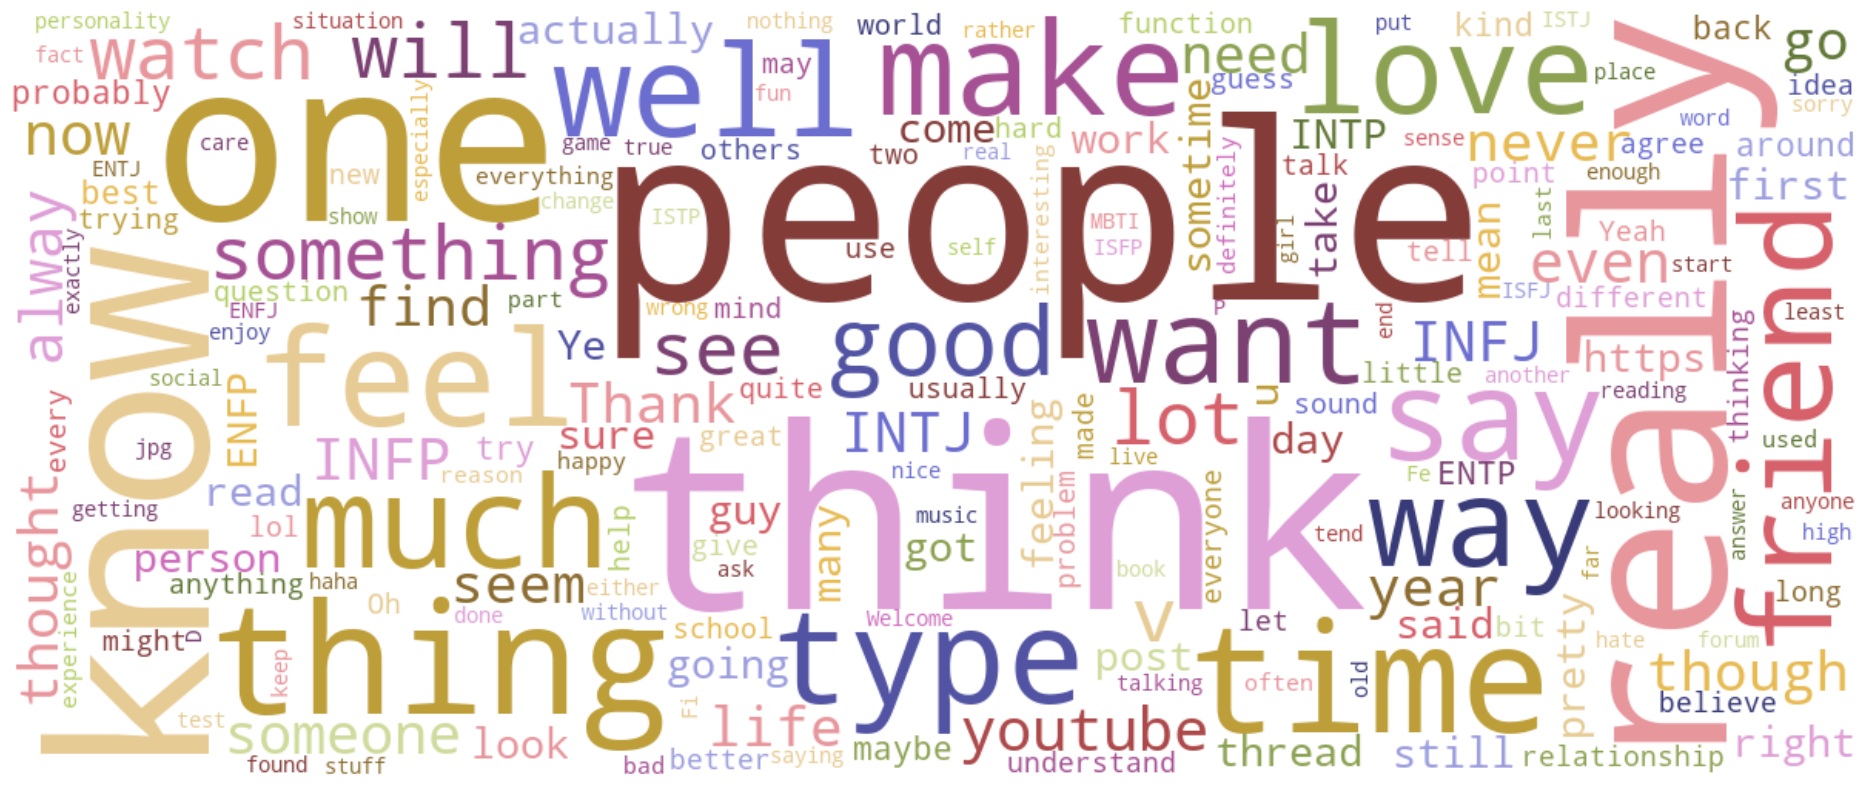

In [15]:
#Visualizing the most frequently occuring words.
from wordcloud import wordcloud

wc = wordcloud.WordCloud(width=1200, height=500,collocations=False, background_color="white", colormap="tab20b").generate(" ".join(wordsList))
plot.figure(figsize=(25,10))
plot.imshow(wc,interpolation = 'bilinear')
_ = plot.axis("off")

In [16]:
import re

#this function helps us to clean the data (user comments) by removing web links,punctuations,very short words, accidental letters, y - target variables (personality types) included while commenting, etc.
def preprocess_comments(myData):
    comments = myData['comments'].copy()
    labels = myData['p_types'].copy()
    
    myData["comments"] = myData["comments"].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " "))
    
    myData["comments"] = myData["comments"].apply(lambda x: re.sub(r'\.', ' EOSTokenDot ', x + " "))
    myData["comments"] = myData["comments"].apply(lambda x: re.sub(r'\?', ' EOSTokenQuest ', x + " "))
    myData["comments"] = myData["comments"].apply(lambda x: re.sub(r'!', ' EOSTokenExs ', x + " "))
    
    
    myData["comments"] = myData["comments"].apply(lambda x: re.sub(r'[\.+]', ".",x))

    myData["comments"] = myData["comments"].apply(lambda x: re.sub(r'[^\w\s]','',x))
    
    myData["comments"] = myData["comments"].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))

    myData["comments"] = myData["comments"].apply(lambda x: x.lower())
   
    myData["comments"] = myData["comments"].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x)) 

   
    myData["comments"] = myData["comments"].apply(lambda x: re.sub(r'(\b\w{0,3})?\b','',x)) 
    myData["comments"] = myData["comments"].apply(lambda x: re.sub(r'(\b\w{30,1000})?\b','',x))

    
    return myData


cleaned_Data = preprocess_comments(myData)


#Remove rows with very minimal word counts
print("Before row reduction: Number of comments", len(cleaned_Data)) 

min_words = 15
cleaned_Data["no. of. words"] = cleaned_Data["comments"].apply(lambda x: len(re.findall(r'\w+', x)))

cleaned_Data = cleaned_Data[cleaned_Data["no. of. words"] >= min_words]
print("After row reduction: Number of comments", len(cleaned_Data))

Before row reduction: Number of comments 8675
After row reduction: Number of comments 8466


In [17]:
#Investigating the outcome of the cleaned data.

cleaned_Data.head()

,p_types,comments,no. of. words
0,INFJ,enfp intj moments sportscenter plays...,430
1,ENTP,finding lack these posts very alarming eo...,803
2,INTP,good course which know thats bles...,253
3,INTJ,dear intp enjoyed conversation other eos...,777
4,ENTJ,youre fired eostokendot thats another silly...,402


In [18]:
cleaned_Data.tail()

,p_types,comments,no. of. words
8670,ISFP,ixfp just because always think cats doms...,564
8671,ENFP,eostokendot eostokendot eostokendot this t...,18
8672,INTP,many questions when these things eostokendo...,715
8673,INFP,very conflicted right when comes wanting ...,1184
8674,INFP,been long since have been personalitycafe...,877


In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
pd.options.mode.chained_assignment = None  # default='warn'


cleaned_Data['p_type_encoded'] = encoder.fit_transform(cleaned_Data['p_types'])
#Target Data pre-processing is now completed.

In [20]:
import nltk 

#Please kindly download "stopwords" package using the syntax: nltk.download('stopwords') -if not available on your system.

# OR kindly perform in your command prompt, the operation: python -m nltk.downloader all

from nltk.corpus import stopwords

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [21]:
#vectorizing the comments for model training purposes, filtering "stop words".

import sklearn
from sklearn.feature_extraction.text import CountVectorizer

vectorized_comments = CountVectorizer(analyzer = 'word', stop_words='english')


trainingData_processed = vectorized_comments.fit_transform(cleaned_Data.comments)

#Training Data pre-processing is now completed.


#investigating the order of the vectorised (and processed) comments.
trainingData_processed.shape

(8466, 98555)

In [22]:
#pre-processed target data is passed to a new variable.
targetData_processed = cleaned_Data['p_type_encoded'] 


#**********************************************************
#TRAINING AND EVALUATION BEGINS
#**********************************************************

from sklearn.model_selection import train_test_split

#Splitting the processed data into training data and testing data in the 60-40 ratio scenario respectively.
X_train, X_test, y_train, y_test = train_test_split(trainingData_processed, targetData_processed, test_size=0.4, stratify=targetData_processed, random_state=42)
print ((X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape))

(5079, 98555) (5079,) (3387, 98555) (3387,)


In [23]:
#A dictionary to report the performance of select algorithms under investigation.
results_accuracy = {}

#XG Boost 
from xgboost import XGBClassifier

xg_boost = XGBClassifier()
xg_boost.fit(X_train,y_train)

Y_pred = xg_boost.predict(X_test)
predictions = [round(value) for value in Y_pred]


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test, predictions)
results_accuracy['XG_Boost'] = accuracy * 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 57.87%


In [24]:

#Logistic Regression
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

Y_pred = logistic_reg.predict(X_test)
predictions = [round(value) for value in Y_pred]


accuracy = accuracy_score(y_test, predictions)
results_accuracy['Logistic_Regression'] = accuracy * 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 58.22%


C:\Users\Harrison.Obidinnu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state = 1)
random_forest.fit(X_train, y_train)


Y_pred = random_forest.predict(X_test)
predictions = [round(value) for value in Y_pred]


accuracy = accuracy_score(y_test, predictions)
results_accuracy['Random Forest'] = accuracy * 100.0 
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 39.53%


In [27]:
#Result Observation:
#The first scenario training and testing algorithm cases yielded unsatisfactory results with roughly average accuracies. 



#Testing out algorithms based on 70-30 train-test split ratio scenario

X_train, X_test, y_train, y_test = train_test_split(trainingData_processed, targetData_processed, test_size=0.3, stratify=targetData_processed, random_state=42)
print ((X_train.shape),(y_train.shape),(X_test.shape),(y_test.shape))


(5926, 98555) (5926,) (2540, 98555) (2540,)


In [28]:
#Second phase training and testing

#A dictionary to report the performance of fewer select algorithms under investigation.
results_accuracy = {}

#XG Boost 
xg_boost = XGBClassifier()
xg_boost.fit(X_train,y_train)

Y_pred = xg_boost.predict(X_test)
predictions = [round(value) for value in Y_pred]

accuracy = accuracy_score(y_test, predictions)
results_accuracy['XG_Boost'] = accuracy * 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 57.56%


In [29]:
#Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

Y_pred = logistic_reg.predict(X_test)
predictions = [round(value) for value in Y_pred]


accuracy = accuracy_score(y_test, predictions)
results_accuracy['Logistic_Regression'] = accuracy * 100.0
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 58.27%


C:\Users\Harrison.Obidinnu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [183]:

#As is observed, the second phase 70-30 split scenario did not yield any positive improvement in accuracy.

#We resort to the MBTI system which divides the 16 classifications (that contains 4 personalities pair - each)
#across 4 classification axes (that contains 2 personalities pair - each)

myData2 = pd.read_csv(r"MBTI_DataSet.csv")
myData2

,p_types,comments
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


In [184]:
#The rationale behind the MBTI division is borne out of the fact that, from the 16 personalities classes 

#which consist of 4 pair each, a person is ordinarily either:

#an introvert (I) or an extrovert (E)

#one that applies more of intuition (N) or more of sensing (S)

#one that takes decisions out of Thinking (T) or out of Feeling (F)

#one that tends to judge (J) or tends to perceive (P)
#***********************************************************************************************************



#function to add 4 columns that represents these classification axes.
def get_MBTI_types(records):
    p_type = records['p_types']
    I = 0; N = 0; T = 0; J = 0
    
    if p_type[0] == 'I':
        I = 1
    elif p_type[0] == 'E':
        I = 0
    
    if p_type[1] == 'N':
        N = 1
    elif p_type[1] == 'S':
        N = 0
    
    if p_type[2] == 'T':
        T = 1
    elif p_type[2] == 'F':
        T = 0
    
    if p_type[3] == 'J':
        J = 1
    elif p_type[3] == 'P':
        P = 0
    
    return pd.Series({'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

#The columns are added to the input Data in the vertical axis / direction.
myData2 = myData2.join(myData2.apply (lambda records: get_MBTI_types(records),axis=1))
myData2.head(5)

,p_types,comments,IE,NS,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,1,1,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,0,1,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,1,1,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1,1,1,1
4,ENTJ,'You're fired.|||That's another silly misconce...,0,1,1,1


In [185]:
#Keeps a dictionary of the MBTI types and the number of occurencies of a specific type in each MBTI personality pair.
MBTI_SummaryGroups = {}
MBTI_SummaryGroups['Introversion (I) -  Extroversion (E)'] = str(myData2['IE'].value_counts()[0]) + "-" + str(myData2['IE'].value_counts()[1])
MBTI_SummaryGroups['Intuition (N) - Sensing (S)'] = str(myData2['NS'].value_counts()[0]) + "-" + str(myData2['NS'].value_counts()[1])
MBTI_SummaryGroups['Thinking (T) - Feeling (F)'] = str(myData2['TF'].value_counts()[0]) + "-" + str(myData2['TF'].value_counts()[1])
MBTI_SummaryGroups['Judging (J) - Perceiving (P)'] = str(myData2['JP'].value_counts()[0]) + "-" + str(myData2['JP'].value_counts()[1])
MBTI_SummaryGroups

{'Introversion (I) -  Extroversion (E)': '1999-6676',
 'Intuition (N) - Sensing (S)': '1197-7478',
 'Thinking (T) - Feeling (F)': '4694-3981',
 'Judging (J) - Perceiving (P)': '5241-3434'}

In [186]:
#applying lemmatization to group, analyse and bring to context, similar words. 

#This helps improve performance of model when subjected to new data during prediction.

from nltk.stem import WordNetLemmatizer
lemmatiser = WordNetLemmatizer()

The_stopWords = stopwords.words('english')
p_types_lowerCase = [p_types.lower() for p_types in p_types_unique]

#this function helps us to clean the data (user comments) 



def preprocess_comments2(myData2):
    
    comments_cleaned_List = []
    targetRows_processed_List = []
    
    for n in range(len(myData2.index)):
        
        comments_per_row1 = myData2.iloc[n,1]
        
        #by removing web links,punctuations,very short words, accidental letters,changing to lower cases, etc.
        comments_per_row = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', comments_per_row1)
        comments_per_row = re.sub("[^a-zA-Z]", " ", comments_per_row)
        comments_per_row = re.sub(' +', ' ', comments_per_row).lower()
        comments_per_row = re.sub(r'([a-z])\1{2,}[\s|\w]*', '', comments_per_row)
        
        #joining each of the 50 user comments in each row, while applying lemmatisation
        comments_per_row = " ".join([lemmatiser.lemmatize(words) for words in comments_per_row.split(' ') if words not in The_stopWords])
                 
        for p_types in p_types_lowerCase:
            
            #by removing y variables (that is, the target personality types) included while commenting, etc.
            comments_per_row = comments_per_row.replace(p_types,"") 
        
        #cleaning (and joining) of row is now completed.
        comments_per_row_cleaned = comments_per_row
        
        #so add it to conatiner of cleaned rows.
        comments_cleaned_List.append(comments_per_row_cleaned)
        
        
        #get the MBTI values of each row. (numpy collects it from the dataframe as an array of array.)
        targetRow_array = np.array(myData2.iloc[n:n+1,2:6])
        
        #flatten the multi-dimensional array to a one-dimensional array.
        targetRow_array_1D = targetRow_array.flatten()
       
        #fit and encode each target row. Each row is now processed.
        targetRow_processed = encoder.fit_transform(targetRow_array_1D)
        
        
        #so add it to conatiner of processed target rows.
        targetRows_processed_List.append(targetRow_processed)
        
    
    return comments_cleaned_List, targetRows_processed_List


comments_cleaned_List, targetRows_processed_List = preprocess_comments2(myData2)
        
    
   
print("\nComments after Cleaning:\n\n", comments_cleaned_List[0])

print("\nMBTI Post after preprocessing:\n\n", targetRows_processed_List[0])



Comments after Cleaning:

    moment sportscenter top ten play prank life changing experience life repeat today may perc experience immerse last thing  friend posted facebook committing suicide next day rest peace hello  sorry hear distress natural relationship perfection time every moment existence try figure hard time time growth welcome stuff game set match prozac wellbrutin least thirty minute moving leg mean moving sitting desk chair weed moderation maybe try edible healthier alternative basically come three item determined type whichever type want would likely use given type cognitive function whatnot left thing moderation sims indeed video game good one note good one somewhat subjective completely promoting death given sim dear  favorite video game growing current favorite video game cool appears late sad someone everyone wait thought confidence good thing cherish time solitude b c revel within inner world whereas time workin enjoy time worry people always around yo  lady compl

In [187]:
#We now process the predictor valiable (The cleaned row comments)

from sklearn.feature_extraction.text import TfidfVectorizer

tfIDF_Vectorizer = TfidfVectorizer(analyzer = 'word',max_features=1000,max_df=0.7,min_df=0.1)

#Each training data is now processed.
trainingData_processed2 = tfIDF_Vectorizer.fit_transform(comments_cleaned_List).toarray()

trainingData_processed2.shape

(8675, 595)

In [188]:
print("X: 1st posts in tf-idf representation\n%s" % trainingData_processed2[0])

X: 1st posts in tf-idf representation
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.08105478 0.07066064
 0.         0.         0.         0.         0.         0.
 0.         0.04516864 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.05321691 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.0871647  0.         0.         0.
 0.         0.         0.         0.05506308 0.0708757  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.16585935 0.         0.         0.09676192 0.
 0.         0.04970682 0.         0.         0.         0.
 0.07397056 0.         0.         0.         0.         0.
 0.       

In [189]:
MBTI_KeyList = list(MBTI_SummaryGroups.keys())

#convert list container to an array
targetRows_processed_array = np.array(targetRows_processed_List)

#renaming for clarity of next action.
targetColumns_processed_array = targetRows_processed_array

for mbti in range(len(MBTI_SummaryGroups)):
    
    #next action: getting each MBTI Column
    mbtiColumn_processed = targetColumns_processed_array[:,mbti]
    
    #Testing out XG Boost algorithm based on 70-30 train-test split ratio scenario
    X_train, X_test, y_train, y_test = train_test_split(trainingData_processed2, mbtiColumn_processed, test_size=0.30, random_state=7)
    
    
    xg_boost = XGBClassifier()
    xg_boost.fit(X_train,y_train)

    Y_pred = xg_boost.predict(X_test)
    predictions = [round(value) for value in Y_pred]

    accuracy = accuracy_score(y_test, predictions)
    
    
    
    print("%s Accuracy: %.2f%%" % (MBTI_KeyList[mbti], accuracy * 100.0))
    
    

Introversion (I) -  Extroversion (E) Accuracy: 63.08%
Intuition (N) - Sensing (S) Accuracy: 72.03%
Thinking (T) - Feeling (F) Accuracy: 68.00%
Judging (J) - Perceiving (P) Accuracy: 72.15%


In [190]:
for mbti in range(len(MBTI_SummaryGroups)):
    
    #next action: getting each MBTI Column
    mbtiColumn_processed = targetColumns_processed_array[:,mbti]
    
    #Testing out Logistic Regression algorithm based on 70-30 train-test split ratio scenario
    X_train, X_test, y_train, y_test = train_test_split(trainingData_processed2, mbtiColumn_processed, test_size=0.30, random_state=7)
    
    
    logistic_reg = LogisticRegression()
    logistic_reg.fit(X_train, y_train)

    Y_pred = logistic_reg.predict(X_test)
    predictions = [round(value) for value in Y_pred]
    
    
    
    accuracy = accuracy_score(y_test, predictions)
    
    print("%s Accuracy: %.2f%%" % (MBTI_KeyList[mbti], accuracy * 100.0))
    
    
    

Introversion (I) -  Extroversion (E) Accuracy: 66.38%
Intuition (N) - Sensing (S) Accuracy: 73.80%
Thinking (T) - Feeling (F) Accuracy: 71.30%
Judging (J) - Perceiving (P) Accuracy: 74.49%


In [191]:
#From the top performing models, we see that, on average, the Logistic Regression model gives the best performance.
# So the Logistic regresion is chosen for the prediction case.

#Also, we would need a function to translate back our prediction from the 4 MBTI personality axes (2 - pair each) back
# to one of the 16 personality types (that has 4 - pair each).
#***********************************************************************************************************************


decode_p_type_list = [{1:'I', 0:'E'}, {1:'N', 0:'S'}, {1:'T', 0:'F'}, {1:'J', 0:'P'}]

#Translates back to one of the 16 personality types (that has 4 - pair each).

def translate_back(encoded_personality):
    # transform encoded vector to 16 - personality type
    p_type = ""
    for i, l in enumerate(encoded_personality):
        
        #access each unit personality from the dictionaries in the decode list (for personality types)
        p_type += decode_p_type_list[i][l]
    return p_type


#************************************************************************************************************************
# Prediction Case - Poetry
#************************************************************************************************************************



new_comments = """ They act like they care They tell me to share But when I carve the stories on my arm The doctor just calls it self harm I’m not asking for attention There’s a reason I have apprehensions I just need you to see What has \ 
                become of me||| I know I’m going crazy But they think my thoughts are just hazy When in that chaos, in that confusion I’m crying out for help, to escape my delusions||| Mental health is a state of mind How does one keep \ 
                that up when assistance is denied All my failed attempts to fight the blaze You treat it like its a passing phase||| Well stop, its not, because mental illness is real Understand that we’re all not made of steel Because when \ 
                you brush these issues under the carpet You make it seem like its our mistake we’re not guarded||| Don’t you realise that its a problem that needs to be addressed Starting at home, in our nest Why do you keep your mouths shut \ 
                about such things Instead of caring for those with broken wings||| What use is this social stigma When mental illness is not even such an enigma Look around and you’ll see the numbers of the affected hiding under the covers ||| \ 
                This is an issue that needs to be discussed Not looked down upon with disgust Mental illness needs to be accepted So that people can be protected ||| Let me give you some direction People need affection The darkness must be escaped \ 
                Only then the lost can be saved||| Bring in a change Something not very strange The new year is here Its time to eradicate fear||| Recognise the wrists under the knives To stop mental illness from taking more lives Let’s break the \ 
                convention Start ‘suicide prevention’.||| Hoping the festival of lights drives the darkness of mental illness away"""


new_data = pd.DataFrame(data={'dummy_type': ['INFP'], 'posts': [new_comments]})

#The 'new_targetRows_processed_List' will be ignored as it is just a dummy outcome from 'dummy_type' input column
#(in a bid to successfully use the pre-process function to pre-process the new comments).

new_comments_cleaned_List, new_targetRows_processed_List = preprocess_comments2(new_data)

print("\n The new comments after Cleaning:\n\n", new_comments_cleaned_List[0])



 The new comments after Cleaning:

  act like care tell share carve story arm doctor call self harm asking attention reason apprehension need see become know going crazy think thought hazy chaos confusion cry help escape delusion mental health state mind one keep assistance denied failed attempt fight blaze treat like passing phase well stop mental illness real understand made steel brush issue carpet make seem like mistake guarded realise problem need addressed starting home nest keep mouth shut thing instead caring broken wing use social stigma mental illness even enigma look around see number affected hiding cover issue need discussed looked upon disgust mental illness need accepted people protected let give direction people need affection darkness must escaped lost saved bring change something strange new year time eradicate fear recognise wrist knife stop mental illness taking life let break convention start suicide prevention hoping festival light drive darkness mental illness a

In [205]:
vectorized_comments = CountVectorizer(analyzer="word", 
                             max_features=1000) 

X_vectorized_comments = vectorized_comments.fit_transform(new_comments_cleaned_List)

#feature_names = list(enumerate(vectorized_comments.get_feature_names()))


from sklearn.feature_extraction.text import TfidfTransformer

tfizer = TfidfTransformer()


#tfIDF_Vectorizer = TfidfVectorizer(analyzer = 'word',max_features=1000)

#The new prediction data is now processed.

PredictionData_processed = tfizer.fit_transform(X_vectorized_comments).toarray()


print(PredictionData_processed)

[[0.06509446 0.06509446 0.06509446 0.06509446 0.06509446 0.06509446
  0.06509446 0.06509446 0.06509446 0.06509446 0.06509446 0.06509446
  0.06509446 0.06509446 0.06509446 0.06509446 0.06509446 0.06509446
  0.06509446 0.06509446 0.06509446 0.06509446 0.06509446 0.06509446
  0.06509446 0.06509446 0.06509446 0.06509446 0.06509446 0.06509446
  0.06509446 0.13018891 0.06509446 0.06509446 0.06509446 0.06509446
  0.06509446 0.06509446 0.06509446 0.06509446 0.06509446 0.06509446
  0.06509446 0.06509446 0.06509446 0.06509446 0.06509446 0.06509446
  0.06509446 0.06509446 0.06509446 0.06509446 0.06509446 0.06509446
  0.06509446 0.06509446 0.06509446 0.06509446 0.32547228 0.06509446
  0.13018891 0.13018891 0.06509446 0.06509446 0.13018891 0.06509446
  0.06509446 0.19528337 0.06509446 0.06509446 0.06509446 0.06509446
  0.06509446 0.39056673 0.06509446 0.06509446 0.06509446 0.06509446
  0.32547228 0.06509446 0.06509446 0.06509446 0.06509446 0.06509446
  0.13018891 0.06509446 0.06509446 0.06509446 0.

In [212]:
result = []

for mbti in range(len(MBTI_SummaryGroups)):
    
    #next action: getting each MBTI Column
    mbtiColumn_processed = targetColumns_processed_array[:,mbti]
    
    #Testing out Logistic Regression algorithm based on 70-30 train-test split ratio scenario
    X_train, X_test, y_train, y_test = train_test_split(PredictionData_processed, mbtiColumn_processed, test_size=0.30, random_state=7)
    
    
    logistic_reg = LogisticRegression()
    logistic_reg.fit(X_train, y_train)

    Y_pred = logistic_reg.predict(PredictionData_processed)
    result.append(Y_pred[0])
    
    
#print("The personality type is: ", translate_back(result))